# ===============================
# Air Quality in Nairobi - Starter Notebook
# ===============================
**Description:**  
This notebook demonstrates loading, cleaning, exploring, and modeling synthetic PM2.5 air quality data for Nairobi. It includes time series analysis, rolling averages, ACF/PACF plots, and walk-forward validation using AutoReg.  



In [11]:
# ===============================
# Air Quality in Nairobi - Starter Notebook
# ===============================

# ===============================
# 1. Import Libraries
# ===============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error
import plotly.express as px
import os

In [12]:
# ===============================
# 2. Setup paths
# ===============================
DATA_PATH = "Air-Quality-in-Nairobi/data/raw"
os.makedirs(DATA_PATH, exist_ok=True)

In [13]:
# ===============================
# 3. Generate synthetic data (downloadable)
# ===============================
np.random.seed(42)
n_hours = 1700  # approx 70 days of hourly readings
timestamps = pd.date_range(start="2025-01-01", periods=n_hours, freq="H")
pm25 = np.random.normal(loc=20, scale=5, size=n_hours)  # simulate PM2.5 levels

df = pd.DataFrame({"timestamp": timestamps, "PM2.5": pm25})

# Save CSV for download
csv_path = os.path.join(DATA_PATH, "air_quality_nairobi.csv")
df.to_csv(csv_path, index=False)
print(f"✅ Synthetic raw data saved to: {csv_path}")


✅ Synthetic raw data saved to: Air-Quality-in-Nairobi/data/raw/air_quality_nairobi.csv


/var/folders/2q/qj4n8071707082dm1qbd75s40000gn/T/ipykernel_3586/1314936043.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(start="2025-01-01", periods=n_hours, freq="H")


In [14]:
# ===============================
# 4. Quick Data Exploration
# ===============================
print("\n--- Data Info ---")
print(df.info())

print("\n--- First 5 Rows ---")
display(df.head())

print("\n--- Summary Statistics ---")
display(df.describe())


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  1700 non-null   datetime64[ns]
 1   PM2.5      1700 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 26.7 KB
None

--- First 5 Rows ---


,timestamp,PM2.5
0,2025-01-01 00:00:00,22.483571
1,2025-01-01 01:00:00,19.308678
2,2025-01-01 02:00:00,23.238443
3,2025-01-01 03:00:00,27.615149
4,2025-01-01 04:00:00,18.829233



--- Summary Statistics ---


,timestamp,PM2.5
count,1700,1700.000000
mean,2025-02-05 09:30:00,20.235754
min,2025-01-01 00:00:00,3.793663
25%,2025-01-18 16:45:00,16.874977
50%,2025-02-05 09:30:00,20.233543
75%,2025-02-23 02:15:00,23.409534
max,2025-03-12 19:00:00,39.263657
std,NaN,4.956826


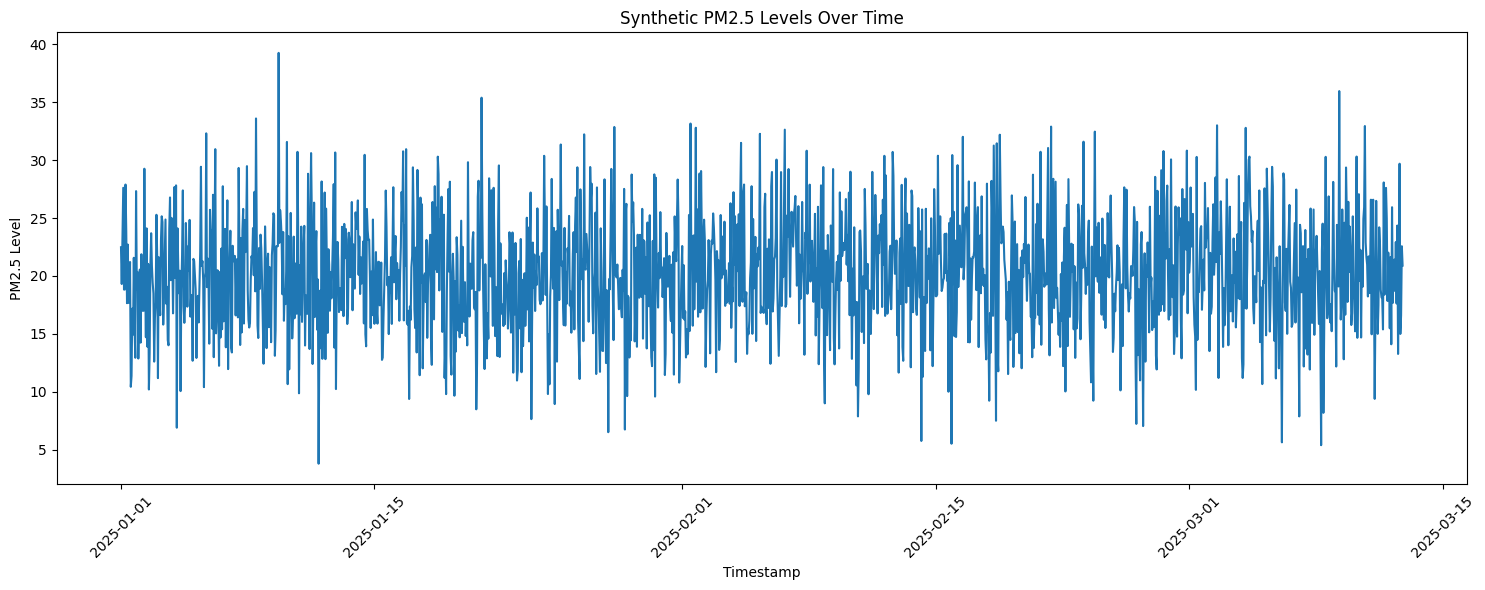

In [15]:
# ===============================
# 5. Plot PM2.5 Time Series
# ===============================
plt.figure(figsize=(15, 6))
plt.plot(df['timestamp'], df['PM2.5'])
plt.xlabel("Timestamp")
plt.ylabel("PM2.5 Level")
plt.title("Synthetic PM2.5 Levels Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

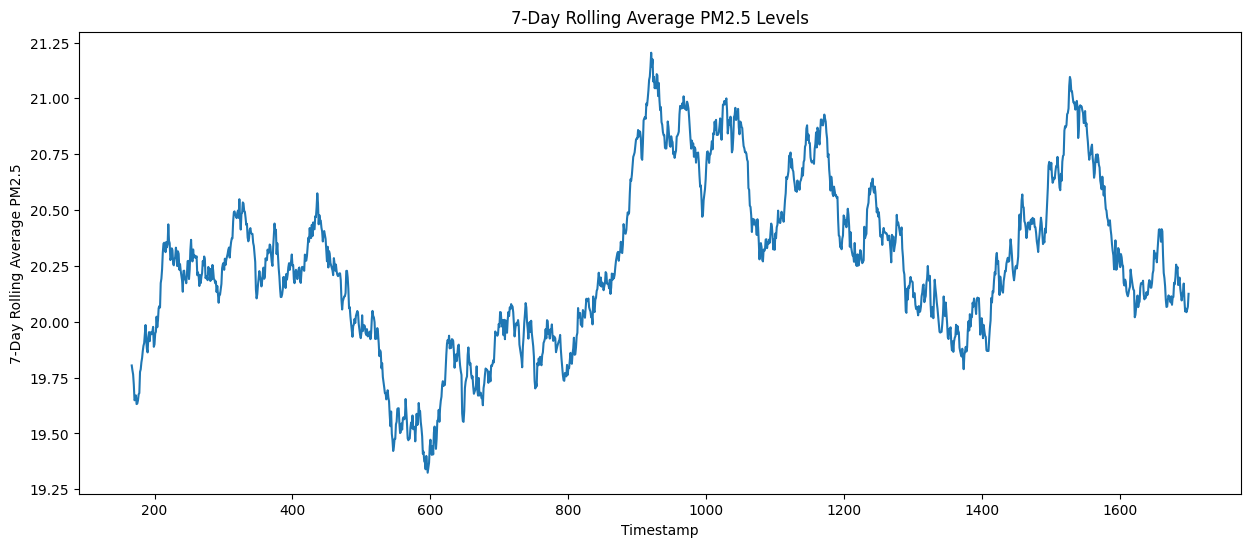

In [16]:
# ===============================
# 6. Plot Rolling Average
# ===============================
plt.figure(figsize=(15, 6))
df['PM2.5'].rolling(window=24*7).mean().plot()
plt.xlabel("Timestamp")
plt.ylabel("7-Day Rolling Average PM2.5")
plt.title("7-Day Rolling Average PM2.5 Levels")
plt.show()

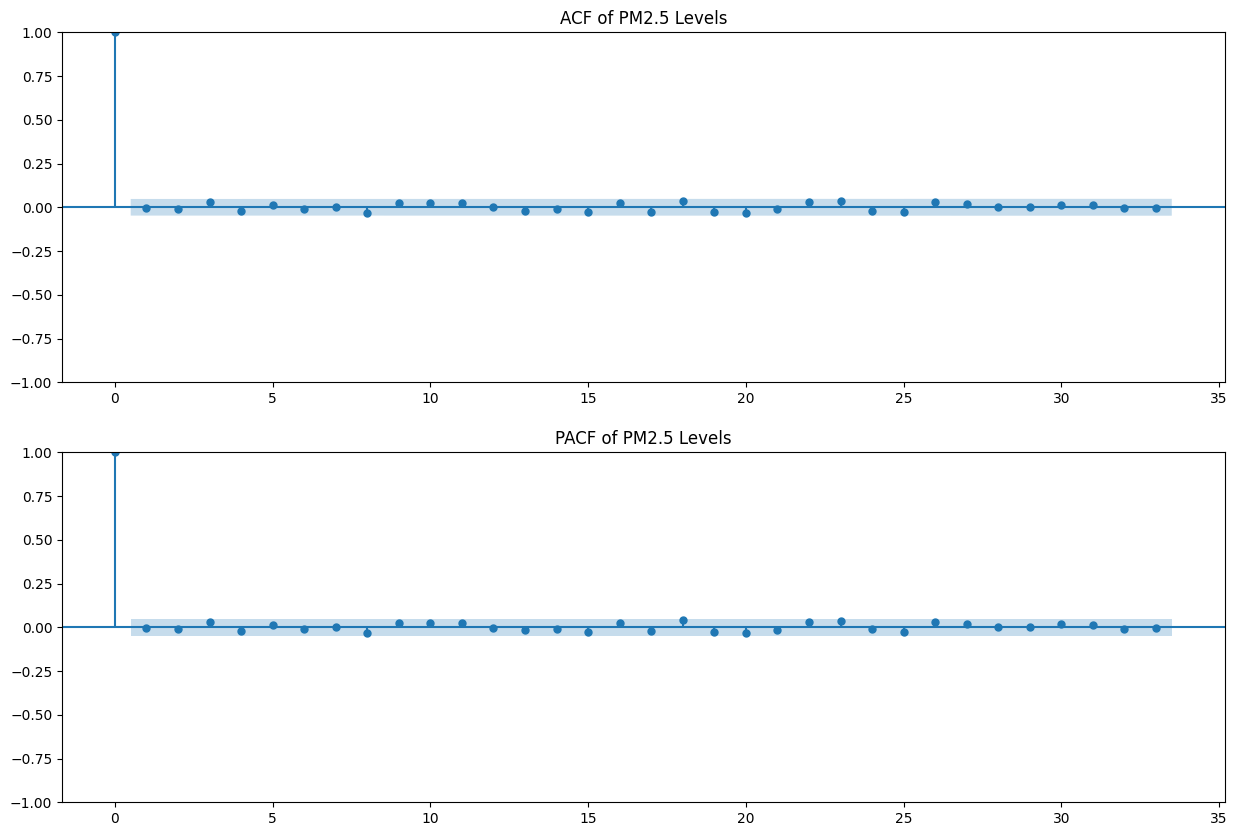

In [17]:

# ===============================
# 7. ACF / PACF Plots
# ===============================
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
plot_acf(df['PM2.5'], ax=ax[0])
ax[0].set_title("ACF of PM2.5 Levels")
plot_pacf(df['PM2.5'], ax=ax[1])
ax[1].set_title("PACF of PM2.5 Levels")
plt.show()

In [18]:

# ===============================
# 8. Train/Test Split
# ===============================
cutoff = int(len(df) * 0.9)
y_train = df['PM2.5'].iloc[:cutoff]
y_test = df['PM2.5'].iloc[cutoff:]

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1530,)
y_test shape: (170,)


In [19]:
# ===============================
# 11. Plot Predictions vs True Values
# ===============================
df_pred = pd.DataFrame({"y_test": y_test, "y_pred_wfv": y_pred_wfv})

fig = px.line(df_pred, labels={"value": "PM2.5"})
fig.update_layout(
    title="Walk-Forward Validation Predictions vs True PM2.5",
    xaxis_title="Timestamp",
    yaxis_title="PM2.5 Level"
)
fig.show()

NameError: name 'y_pred_wfv' is not defined

In [ ]:
# ===============================
# 10. Evaluation
# ===============================
mae = mean_absolute_error(y_test, y_pred_wfv)
print(f"Walk-forward validation MAE: {mae:.4f}")

In [ ]:
# ===============================
# 9. AutoReg Model Walk-Forward Validation
# ===============================
best_p = 24  # lag parameter, can tune
y_pred_wfv = pd.Series(dtype=float)
history = y_train.copy()

for i in range(len(y_test)):
    model = AutoReg(history, lags=best_p).fit()
    next_pred = model.predict(start=len(history), end=len(history))
    y_pred_wfv = y_pred_wfv.append(next_pred)
    history = history.append(y_test.iloc[i:i+1])

y_pred_wfv.index = y_test.index
y_pred_wfv.name = "Prediction"

# ===============================
# Notebook Completed
# ===============================
**Summary:**  
- Synthetic PM2.5 data generated and saved.  
- Data exploration and visualization completed.  
- AutoReg walk-forward validation performed.  
- Predictions vs true values plotted.  

✅ Notebook executed successfully.  

